### 01. Importing Libraries and Dataframes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# For displaying graphs

%matplotlib inline

In [3]:
#Importing DF

path = r'C:\Users\William Inglish\Project 6 Liquor Sales'

df_sales = pd.read_csv(os.path.join(path,'02 Data', 'Prepared', 'Sales_Wrangled.csv'), index_col = 0)

### 02. Data Wrangling

In [4]:
# Removing all outliers from the bottles_sold field

df_sales_wrangled = df_sales[df_sales['bottles_sold'] <= 25]

In [5]:
df_sales_wrangled.shape

(2651460, 24)

C:\Users\William Inglish\AppData\Local\Temp\ipykernel_7560\278099631.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sales_wrangled['bottles_sold'], bins=25) # Shows extreme values


<Axes: xlabel='bottles_sold', ylabel='Density'>

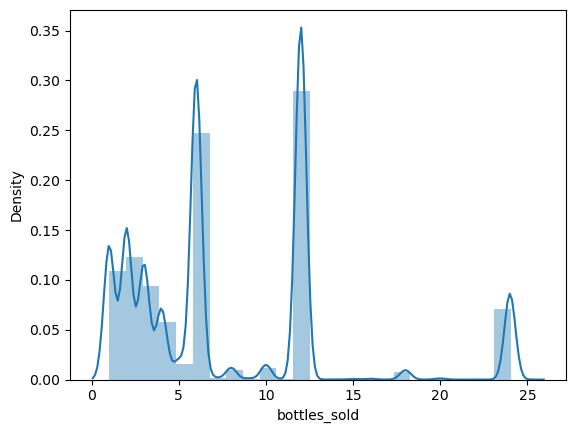

In [6]:
sns.distplot(df_sales_wrangled['bottles_sold'], bins=25) # Shows extreme values

C:\Users\William Inglish\AppData\Local\Temp\ipykernel_7560\2576783297.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sales_wrangled['package_size'], bins=25) # Shows extreme values


<Axes: xlabel='package_size', ylabel='Density'>

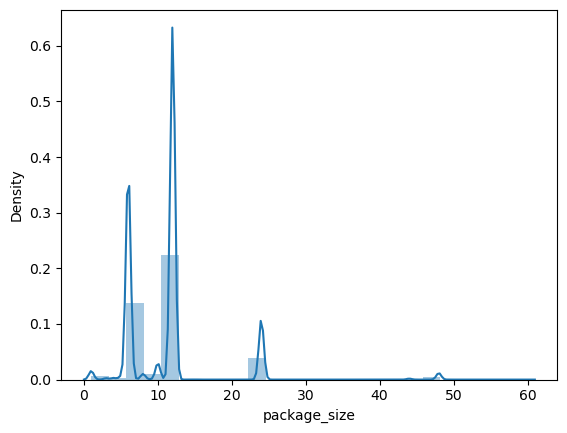

In [7]:
sns.distplot(df_sales_wrangled['package_size'], bins=25) # Shows extreme values

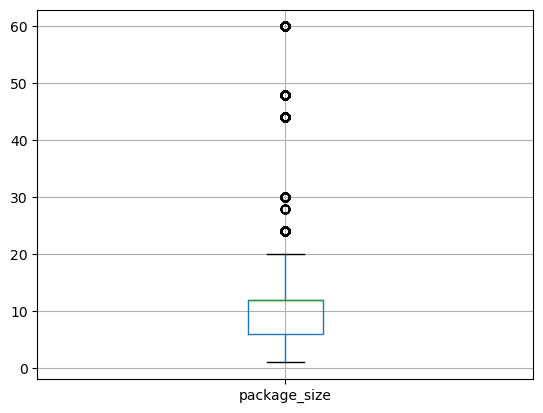

In [8]:
boxplot2 = df_sales_wrangled.boxplot(column=['package_size'])

In [6]:
df_sales_wrangled2 = df_sales_wrangled[df_sales_wrangled['package_size'] <= 20]

In [10]:
df_sales_wrangled2.shape

(2380841, 24)

C:\Users\William Inglish\AppData\Local\Temp\ipykernel_7560\2642994490.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sales_wrangled2['package_size'], bins=25) # Shows extreme values


<Axes: xlabel='package_size', ylabel='Density'>

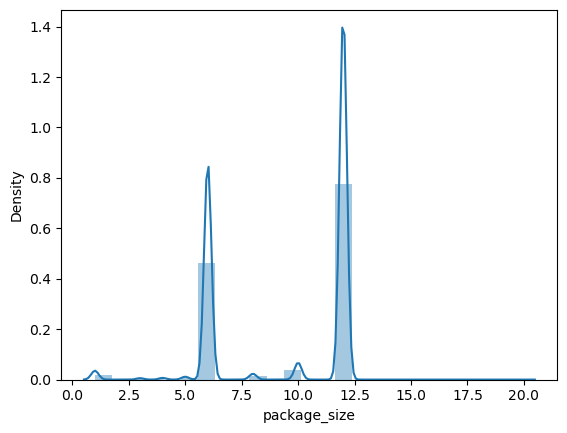

In [11]:
sns.distplot(df_sales_wrangled2['package_size'], bins=25) # Shows extreme values

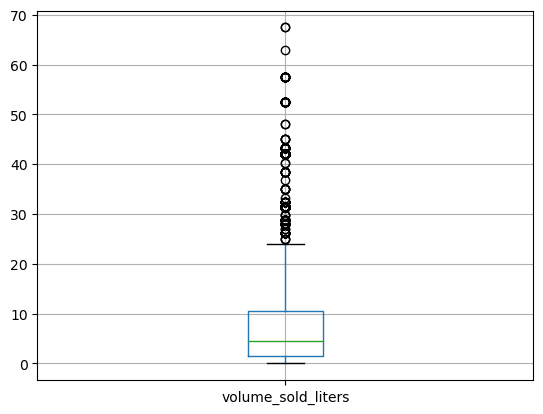

In [12]:
boxplot2 = df_sales_wrangled2.boxplot(column=['volume_sold_liters'])

In [7]:
df_sales_wrangled3 = df_sales_wrangled2[df_sales_wrangled2['volume_sold_liters'] <= 24]

In [8]:
df_sales_wrangled3.shape

(2360433, 24)

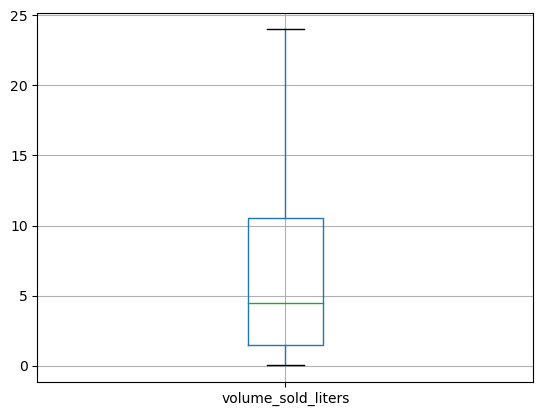

In [15]:
boxplot2 = df_sales_wrangled3.boxplot(column=['volume_sold_liters'])

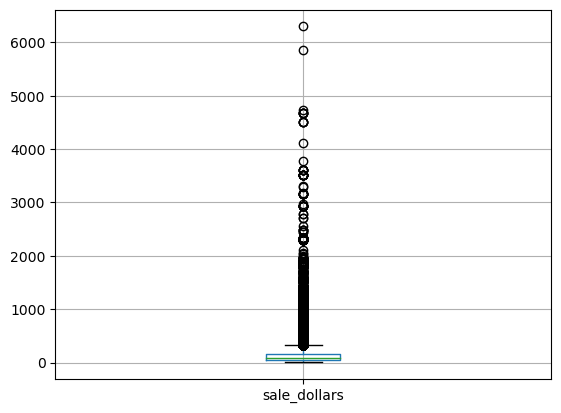

In [16]:
boxplot2 = df_sales_wrangled3.boxplot(column=['sale_dollars'])

In [9]:
df_sales_wrangled4 = df_sales_wrangled3[df_sales_wrangled3['sale_dollars'] <= 300]
df_sales_wrangled4.shape

(2247851, 24)

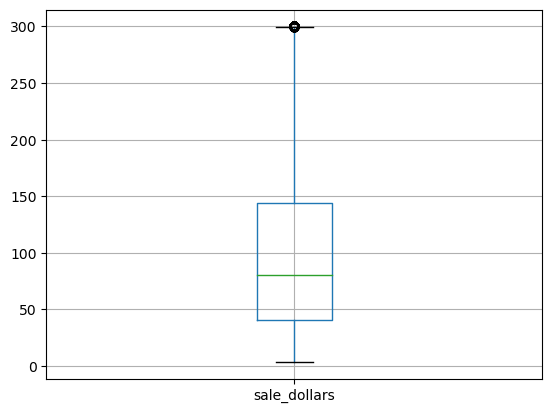

In [18]:
boxplot2 = df_sales_wrangled4.boxplot(column=['sale_dollars'])

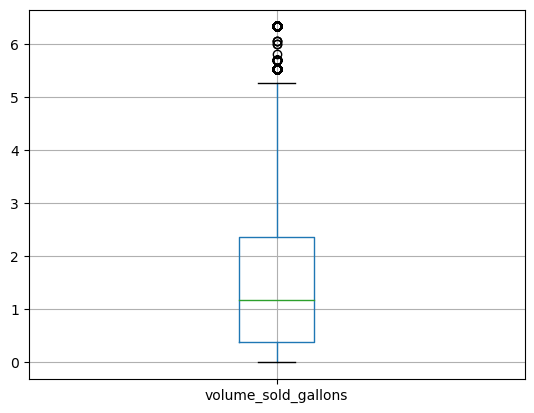

In [10]:
boxplot2 = df_sales_wrangled4.boxplot(column=['volume_sold_gallons'])

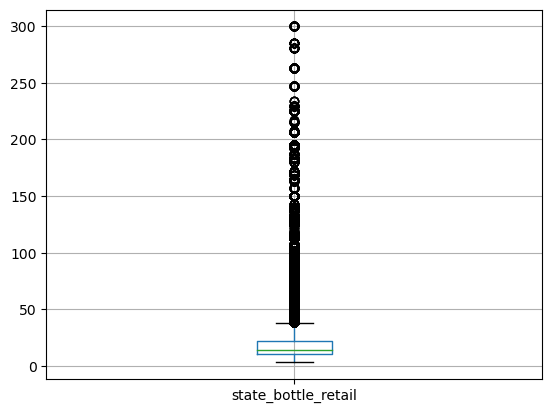

In [11]:
boxplot2 = df_sales_wrangled4.boxplot(column=['state_bottle_retail'])

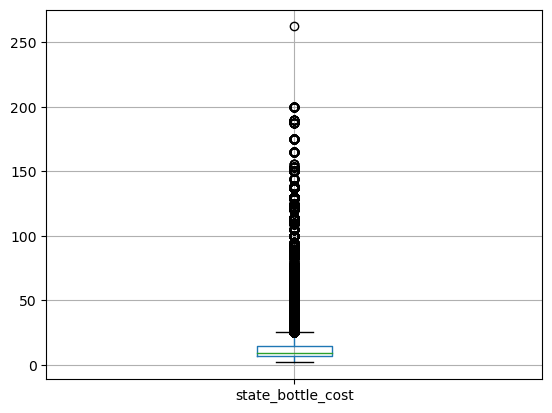

In [24]:
boxplot2 = df_sales_wrangled4.boxplot(column=['state_bottle_cost'])

### 03. Exploring Data Visually

In [19]:
df_sales_wrangled4.head(10)

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county_name,...,item_number,item_description,package_size,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
1,INV-33196200106,2021-01-04,2649,Hy-Vee #3 / Dubuque,400 Locust St,Dubuque,52001.0,POINT (-90.666497 42.49721900000001),31.0,DUBUQUE,...,65200,Tequila Rose Liqueur,12,750,11.50,17.25,4,69.00,3.0,0.79
2,INV-33184300011,2021-01-04,2539,Hy-Vee Food Store / Iowa Falls,640 S. Oak,Iowa Falls,50126.0,POINT (-93.262364 42.508752),42.0,HARDIN,...,38008,Smirnoff 80prf PET,6,1750,14.75,22.13,6,132.78,10.5,2.77
3,INV-33184100015,2021-01-04,4024,Wal-Mart 1546 / Iowa Falls,840 S Oak,Iowa Falls,50126.0,POINT (-93.262446 42.503407),42.0,HARDIN,...,36648,Caliber Vodka,12,750,3.31,4.97,12,59.64,9.0,2.37
4,INV-33174200025,2021-01-04,5385,Vine Food & Liquor,2704 Vine St.,West Des Moines,50265.0,POINT (-93.741511 41.580206),77.0,POLK,...,4626,Buchanan Deluxe 12YR,12,750,20.99,31.49,2,62.98,1.5,0.39
5,INV-33186700007,2021-01-04,4110,"Brothers Market, Inc.",706 Highway 57,Parkersburg,50665.0,POINT (-92.785196 42.570357),12.0,BUTLER,...,34821,Svedka 80prf,6,1750,13.50,20.25,6,121.50,10.5,2.77
6,INV-33197500003,2021-01-04,4228,Fareway Stores #462 / Vinton,501 A Ave,Vinton,52349.0,POINT (-92.025603 42.166166),6.0,BENTON,...,34006,Absolut Swedish Vodka 80prf,12,750,9.99,14.99,12,179.88,9.0,2.37
7,INV-33197200010,2021-01-04,2713,Hy-Vee Dyersville Dollar Fresh,1201 12th Ave SE,Dyersville,52040.0,POINT (-91.110798 42.475283),31.0,DUBUQUE,...,36308,Hawkeye Vodka,6,1750,7.17,10.76,6,64.56,10.5,2.77
8,INV-33174600126,2021-01-04,2648,Hy-Vee #4 / WDM,555 S 51st St,West Des Moines,50265.0,POINT (-93.773557 41.561197),77.0,POLK,...,5318,Johnnie Walker Double Black,6,750,24.05,36.08,6,216.48,4.5,1.18
9,INV-33202000002,2021-01-04,5735,Super Saver Liquor -Muscatine,1510 A Isett Avenue,Muscatine,52761.0,POINT (-91.042755 41.440327),70.0,MUSCATINE,...,86739,Ole Smoky Apple Pie Moonshine 70prf Mini,8,50,8.75,13.13,8,105.04,0.4,0.10
10,INV-33176800008,2021-01-04,4449,Kum & Go #121 / Urbandale,12041 Douglas Pkwy,Urbandale,50322.0,POINT (-93.782998 41.62962),77.0,POLK,...,43051,Bacardi Dragon Berry,12,750,8.26,12.39,2,24.78,1.5,0.39


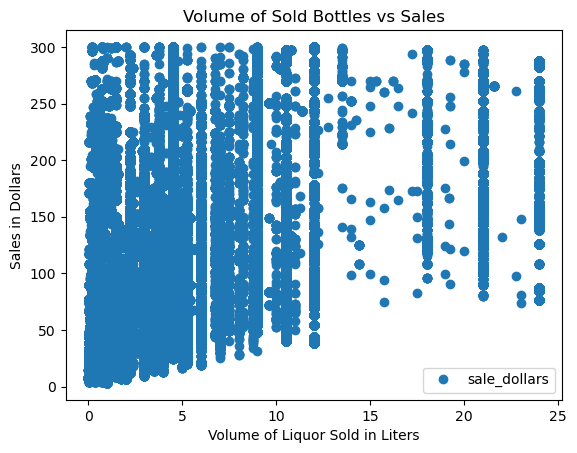

In [20]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_sales_wrangled4.plot(x = 'volume_sold_liters', y='sale_dollars',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Volume of Sold Bottles vs Sales')  
plt.xlabel('Volume of Liquor Sold in Liters')  
plt.ylabel('Sales in Dollars')  
plt.show()

We can tell there is a slight positive trend whenever the volume of the liquor increases, so does the minimum amount of sales dollars it has.
However, it is important to note I remove all outliers from both fields as shown in the previous section.

### 04. Hypothesis Before Regression

1. That there will be a slight positive correlation between volume of liters sold and number of sales dollars.
   This means that whenever the volume of liters sold increase, so does the number of sales dollars.

### 05. Linear Regression

In [21]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_sales_wrangled4['volume_sold_liters'].values.reshape(-1,1)
y = df_sales_wrangled4['sale_dollars'].values.reshape(-1,1)

In [22]:
# Verifying X variable

X[:30]

array([[ 3.  ],
       [10.5 ],
       [ 9.  ],
       [ 1.5 ],
       [10.5 ],
       [ 9.  ],
       [10.5 ],
       [ 4.5 ],
       [ 0.4 ],
       [ 1.5 ],
       [ 3.  ],
       [12.  ],
       [ 3.  ],
       [ 2.25],
       [ 0.15],
       [ 3.  ],
       [ 9.  ],
       [ 1.5 ],
       [ 9.  ],
       [ 2.  ],
       [ 3.  ],
       [ 2.25],
       [ 9.  ],
       [10.5 ],
       [ 9.  ],
       [ 4.5 ],
       [ 0.75],
       [ 9.  ],
       [10.5 ],
       [ 9.  ]])

In [23]:
# Verifying y variable

y[:30]

array([[ 69.  ],
       [132.78],
       [ 59.64],
       [ 62.98],
       [121.5 ],
       [179.88],
       [ 64.56],
       [216.48],
       [105.04],
       [ 24.78],
       [ 98.96],
       [ 99.  ],
       [ 81.  ],
       [ 24.75],
       [ 23.22],
       [ 35.43],
       [280.68],
       [ 24.  ],
       [117.  ],
       [ 23.62],
       [ 44.43],
       [ 38.97],
       [135.  ],
       [189.  ],
       [153.  ],
       [188.82],
       [ 15.75],
       [162.  ],
       [ 64.56],
       [252.  ]])

In [24]:
# Splitting data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [25]:
# Creating a regression object.

reg = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [26]:
# Fitting the regression object onto the training set.

reg.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predicting the values of y using X.

y_predicted = reg.predict(X_test)

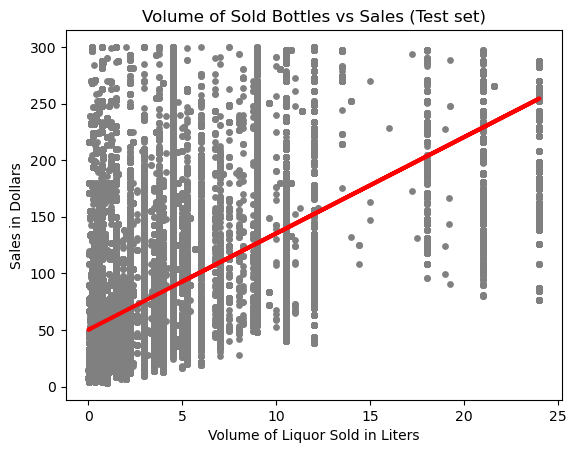

In [28]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Volume of Sold Bottles vs Sales (Test set)')  
plot_test.xlabel('Volume of Liquor Sold in Liters')  
plot_test.ylabel('Sales in Dollars')  
plot_test.show()

In [29]:
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [30]:
# Printing the model summary statistics.AKA Evaluating model

print('Slope:' ,reg.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[8.5151246]]
Mean squared error:  3808.2965329799968
R2 score:  0.30977257487219145


This is an ok MSE since I have 2 million records, however it isn't the best. This is backed up by my R2 score which shows it can relatively predict accurately, 
but it still isn't the best model.

In [31]:
y_predicted

array([[ 92.64559655],
       [126.70609495],
       [ 88.38803425],
       ...,
       [ 50.92148601],
       [ 88.38803425],
       [ 50.49572978]])

In [32]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,54.30,92.645597
1,143.88,126.706095
2,90.00,88.388034
3,199.32,126.706095
4,13.80,50.921486
5,49.48,62.842660
6,174.84,152.251469
7,74.67,69.229004
8,38.40,50.921486
9,13.80,50.921486


In [34]:
# Predict.

y_predicted_train = reg.predict(X_train) # This is predicting X_train!

In [35]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [37]:
print('Slope:' ,reg.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[8.5151246]]
Mean squared error:  3786.9613613283655
R2 score:  0.31061354384542794


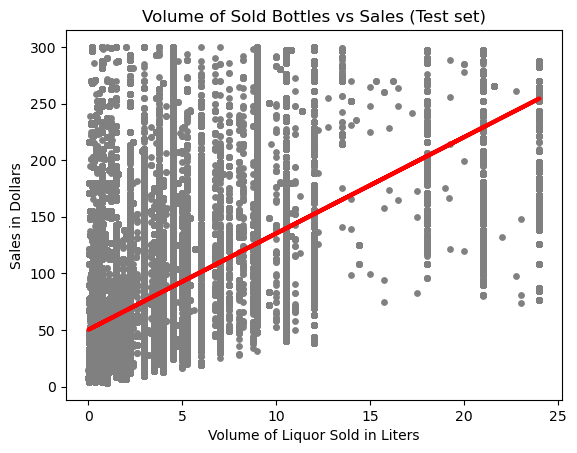

In [39]:
# Looking at regression line to see if it fits training

plot_test = plt
plot_test.scatter(X_train, y_train, color='gray', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Volume of Sold Bottles vs Sales (Training set)')  
plot_test.xlabel('Volume of Liquor Sold in Liters')  
plot_test.ylabel('Sales in Dollars')  
plot_test.show()

Overall, I would say that the model can predict accurately between 30 to 32 percent. This means that there is a positive slope, however, it isn't a great fit.
This rules out my hypothesis since there is a lot of variance in my dataset even with outliers expunged.

### 06. Testing other variables relationship (This is for myself later on)

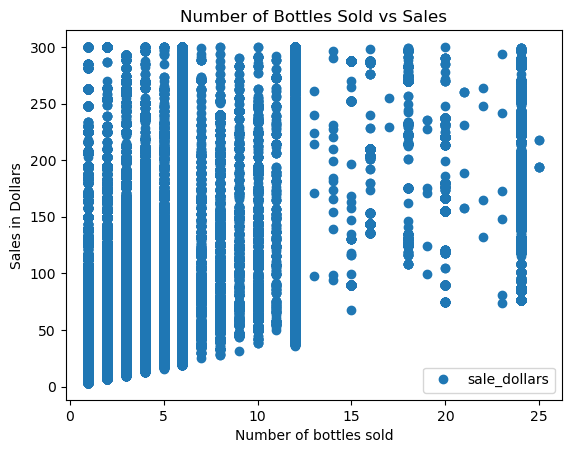

In [33]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_sales_wrangled4.plot(x = 'bottles_sold', y='sale_dollars',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of Bottles Sold vs Sales')  
plt.xlabel('Number of bottles sold')  
plt.ylabel('Sales in Dollars')  
plt.show()

I can already tell that these variables will have a similar regression as the "Sales in Dollars v Volume of Liquor Sold in Liters".